Saving tmdb_5000_movies.csv to tmdb_5000_movies.csv


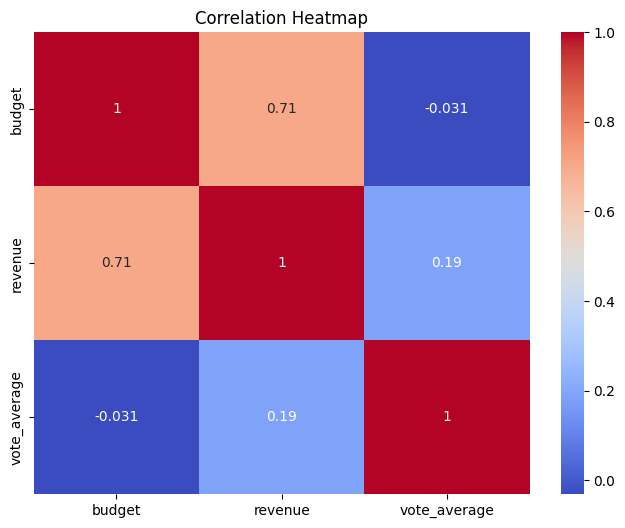

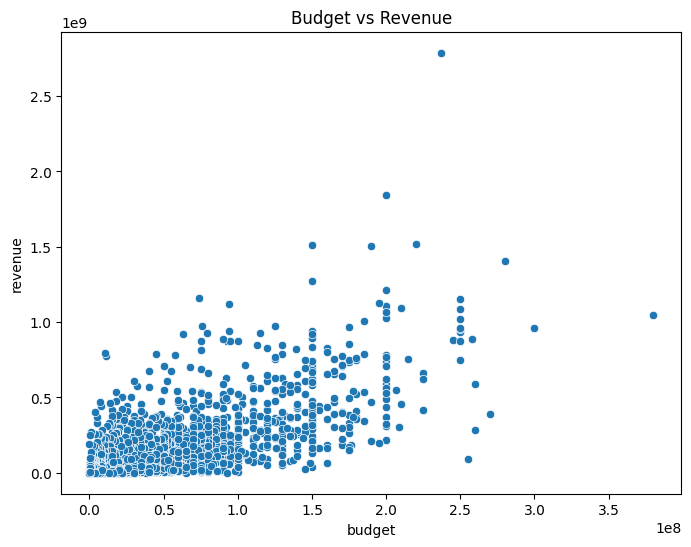

Model Performance:
R2 Score: 0.5239273051991273
RMSE: 155123159.28072998


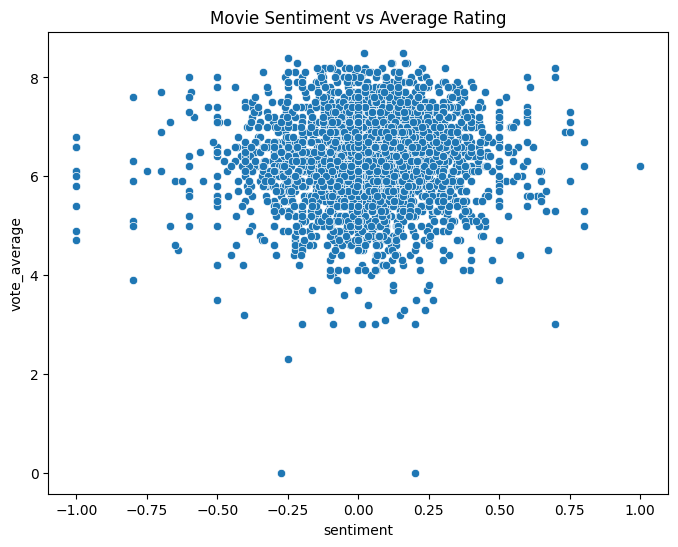

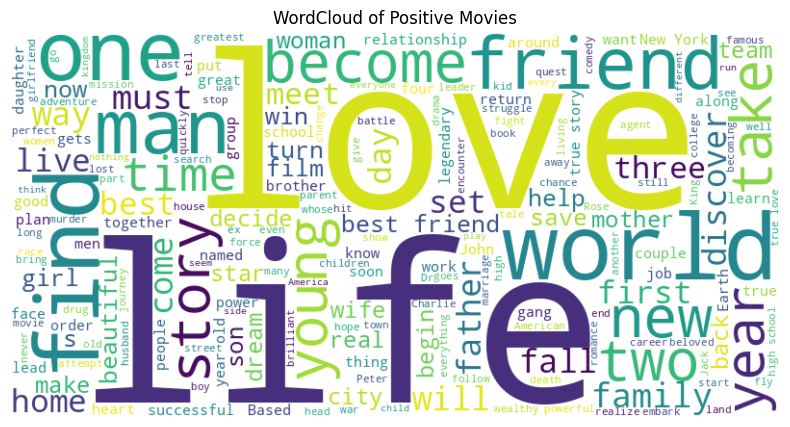

Processed dataset saved.


In [1]:
# -------------------------------
# Movie Ratings Analysis
# -------------------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from wordcloud import WordCloud
from textblob import TextBlob
from google.colab import files

uploaded = files.upload()   # Choose tmdb_5000_movies.csv from your computer


# Load Dataset (TMDB dataset from Kaggle)
df = pd.read_csv("tmdb_5000_movies.csv")

# -------------------------------
# 1. Data Cleaning
# -------------------------------
df = df[['budget', 'revenue', 'vote_average', 'genres', 'title', 'overview']]
df = df.dropna()

# Convert budget and revenue to numeric
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['revenue'] = pd.to_numeric(df['revenue'], errors='coerce')

# Drop rows with 0 values in important columns
df = df[(df['budget'] > 0) & (df['revenue'] > 0)]

# -------------------------------
# 2. EDA
# -------------------------------
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df[['budget','revenue','vote_average']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# Budget vs Revenue scatter
plt.figure(figsize=(8,6))
sns.scatterplot(x="budget", y="revenue", data=df)
plt.title("Budget vs Revenue")
plt.show()

# -------------------------------
# 3. Machine Learning Model
# -------------------------------
# Predict revenue from budget + rating
X = df[['budget','vote_average']]
y = df['revenue']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Performance:")
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

# -------------------------------
# 4. Sentiment Analysis (on overviews)
# -------------------------------
def get_sentiment(text):
    if pd.isna(text) or text.strip() == "":
        return 0
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['overview'].apply(get_sentiment)

# Average sentiment vs rating
plt.figure(figsize=(8,6))
sns.scatterplot(x="sentiment", y="vote_average", data=df)
plt.title("Movie Sentiment vs Average Rating")
plt.show()

# Word Cloud for positive movies
positive_text = " ".join(df[df['sentiment']>0.2]['overview'].dropna().tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud of Positive Movies")
plt.show()

# -------------------------------
# Save Final Cleaned Data
# -------------------------------
df.to_csv("processed_movie_dataset.csv", index=False)
print("Processed dataset saved.")
